In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import sys
import importlib
import random

In [3]:
# instantiate train and test datasets
svhn_train_obj = SVHN('train')
svhn_test_obj = SVHN('test')

# load data
data_dict = svhn_train_obj.load()
data_dict_test = svhn_test_obj.load()

In [26]:
# set sample size
test_ratio = 0.2
sample_size = 10000
test_sample_size = int(sample_size * test_ratio)

# create clean dataset
svhn_sampled = random.sample(data_dict['svhn_img'], sample_size)
svhn_test_sampled = random.sample(data_dict_test['svhn_img'], test_sample_size)


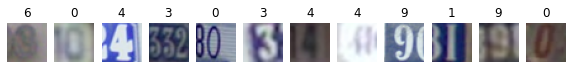

In [27]:
# show 10 images
X = [item['image'] for item in svhn_sampled]
y = [item['label'] for item in svhn_sampled]

X_test = [item['image'] for item in svhn_test_sampled]
y_test = [item['label'] for item in svhn_test_sampled]

figure, ax = plt.subplots(1, 12, figsize=(10,3))
for i in range(12):
    index = np.random.randint(len(X))
    ax[i].set_axis_off()
    ax[i].imshow(X[index])
    ax[i].set_title(np.array(y)[index])

*Get baseline score using  Convolutional Neural Network.*

In [28]:
# run model
cnn = CNN(X, X_test, y, y_test)

# get baseline score
history, loss, acc, predictions = cnn.model(X, X_test, y, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dense_8 (Dense)             (None, 16, 16, 32)       

Loss 1.66 , Accuracy 0.77 on the test set with CNN model.


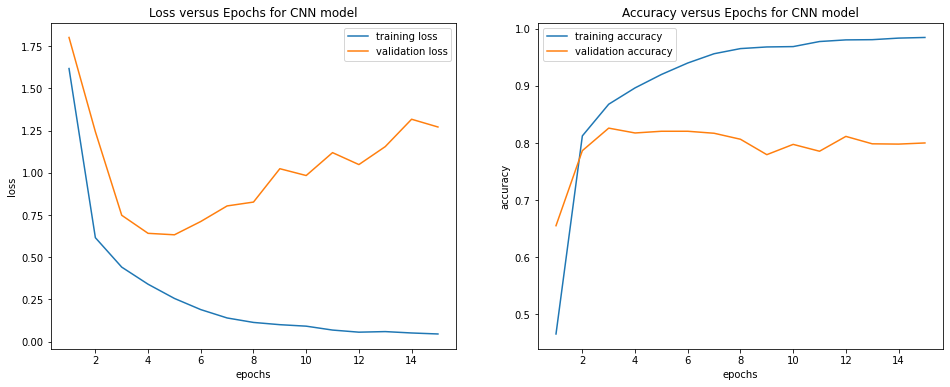

In [36]:
plot_loss = history.history["loss"]
val_loss = history.history["val_loss"]
plot_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = np.arange(len(plot_loss)) + 1

figure, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].plot(epochs, plot_loss, label="training loss")
axes[0].plot(epochs, val_loss, label="validation loss")
axes[0].set_xlabel("epochs")
axes[0].set_ylabel("loss")
axes[0].set_title("Loss versus Epochs for CNN model")
axes[0].legend()

axes[1].plot(epochs, plot_accuracy, label="training accuracy")
axes[1].plot(epochs, val_accuracy, label="validation accuracy")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("accuracy")
axes[1].set_title("Accuracy versus Epochs for CNN model")
axes[1].legend()

print("Loss {:.2f} , Accuracy {:.2f} on the test set with CNN model.".format(loss, acc))
     

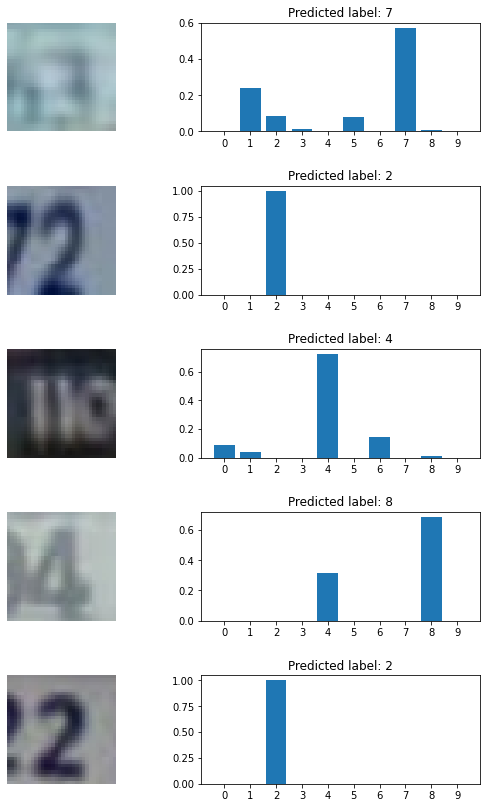

In [30]:
# getting model predictions on sample images from the test set

figure, axes = plt.subplots(5, 2, figsize=(10,14))
for i, (img, label, preds_cnn) in enumerate(zip(X_test[0:5], y_test[0:5], predictions[0:5])):
    axes[i,0].imshow(np.squeeze(img))
    axes[i,0].set_axis_off()
    axes[i,1].bar(np.arange(len(preds_cnn)), preds_cnn)
    axes[i,1].set_xticks(np.arange(len(preds_cnn)))
    axes[i,1].set_title(f"Predicted label: {np.argmax(preds_cnn)}")
 
plt.subplots_adjust(wspace=0.001, hspace=0.5)
plt.show()
     

*Get score using denoiser model:  autoencoding + CNN.*

In [31]:
# run model
denoiser_ae = ConvDenoiser_SVHN(X, X_test, y, y_test)

# get baseline score
history_ae, loss_ae, acc_ae, preds_ae = denoiser_ae.model(X, X_test, y, y_test)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 256)         5900

Loss 0.75 , Accuracy 0.79 on the test set with Denoising Autoencoder model.


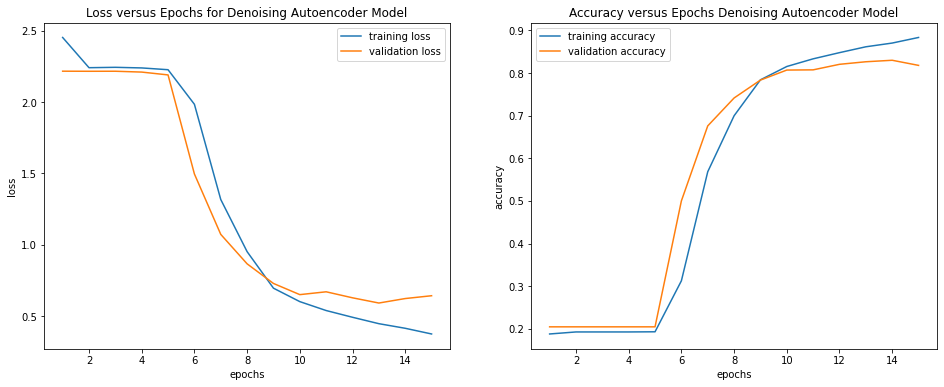

In [32]:
plot_loss = history_ae.history["loss"]
val_loss = history_ae.history["val_loss"]
plot_accuracy = history_ae.history["accuracy"]
val_accuracy = history_ae.history["val_accuracy"]
epochs = np.arange(len(plot_loss)) + 1

figure, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].plot(epochs, plot_loss, label="training loss")
axes[0].plot(epochs, val_loss, label="validation loss")
axes[0].set_xlabel("epochs")
axes[0].set_ylabel("loss")
axes[0].set_title("Loss versus Epochs for Denoising Autoencoder Model")
axes[0].legend()

axes[1].plot(epochs, plot_accuracy, label="training accuracy")
axes[1].plot(epochs, val_accuracy, label="validation accuracy")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("accuracy")
axes[1].set_title("Accuracy versus Epochs Denoising Autoencoder Model")
axes[1].legend()

print("Loss {:.2f} , Accuracy {:.2f} on the test set with Denoising Autoencoder model".format(loss_ae, acc_ae))
     

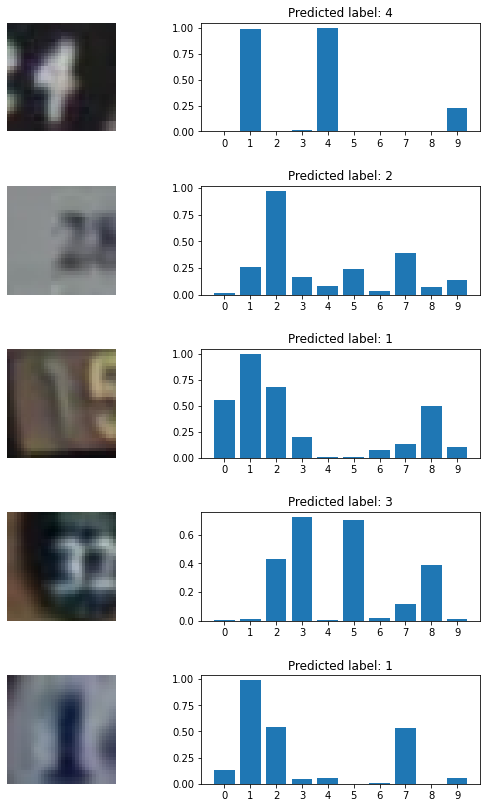

In [33]:
# getting model predictions on sample images from the test set
figure, axes = plt.subplots(5, 2, figsize=(10,14))
for i, (img, label, preds_ae) in enumerate(zip(X_test[20:25], y_test[20:25], preds_ae[20:25])):
    axes[i,0].imshow(np.squeeze(img))
    axes[i,0].set_axis_off()
    axes[i,1].bar(np.arange(len(preds_ae)), preds_ae)
    axes[i,1].set_xticks(np.arange(len(preds_ae)))
    axes[i,1].set_title(f"Predicted label: {np.argmax(preds_ae)}")
 
plt.subplots_adjust(wspace=0.001, hspace=0.5)
plt.show()
     

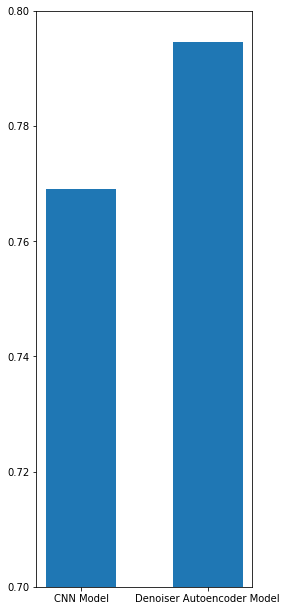

In [54]:
fig = plt.figure(figsize=(3, 8))
ax = fig.add_axes([0,0,1,1])
models = ['CNN Model', 'Denoiser Autoencoder Model']
accs = [acc, acc_ae]
ax.bar(models, accs, width=0.55)
ax.set_ylim([0.70, 0.8])
plt.show()